In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import ast
import re

In [2]:
# Charger le nouveau dataset
recipe = pd.read_csv("recipe/1_recipe_cleaned.csv")
print(recipe.columns)
print(recipe.shape)

Index(['id', 'n_ingredients', 'ingredients', 'n_steps', 'minutes', 'steps'], dtype='object')
(231637, 6)


Variable minutes : traitement des outliers

In [3]:
# Afficher le temps de préparation minimum
print("Temps de préparation minimum :")
print(recipe['minutes'].min())
# Afficher le nombre de recette ayant ce temps de préparation
print("Nombre de recettes avec ce temps de préparation :")
print(recipe[recipe['minutes'] == recipe['minutes'].min()].shape[0])

Temps de préparation minimum :
0
Nombre de recettes avec ce temps de préparation :
1094


In [4]:
# Afficherle temps de préparation maximum
print("Temps de préparation maximum :")
print(recipe['minutes'].max())
# Afficher le nombre de recette ayant ce temps de préparation
print("Nombre de recettes avec ce temps de préparation :")
print(recipe[recipe['minutes'] == recipe['minutes'].max()].shape[0])
# Afficher nombre de recette avec un temps de préparation supérieur à 24 heures
print("Nombre de recettes avec un temps de préparation supérieur à 24 heures :")
print(recipe[recipe['minutes'] > 1440].shape[0])

Temps de préparation maximum :
2147483647
Nombre de recettes avec ce temps de préparation :
1
Nombre de recettes avec un temps de préparation supérieur à 24 heures :
2000


Nous constatons 1094 recettes de 0 minutes et 2000 recettes de plus de 24 heures.

Nous allons les supprimer afin de limiter les effets des outliers, nous pouvons nous le permettre car notre analyse ne porte pas sur les valeurs extrêmes.

Nettoyer le corpus des outliers

In [5]:
# Retirer les recettes avec un temps de préparation de 0 minutes ou supérieur à 24 heures
recipe = recipe[(recipe['minutes'] > 0) & (recipe['minutes'] <= 1440)]
recipe.reset_index(drop=True, inplace=True)
# Sauvegarder le dataset nettoyé
recipe.to_csv("recipe/2_recipe_cleaned_no_outliers.csv", index=False)
# Charger le nouveau dataset
recipe = pd.read_csv("recipe/2_recipe_cleaned_no_outliers.csv")
print(recipe.shape)


(228543, 6)


In [16]:
# Afficher le temps de préparation minimum
print("Temps de préparation minimum :")
print(recipe['minutes'].min())
# Afficher le nombre de recette ayant ce temps de préparation
print("Nombre de recettes avec ce temps de préparation :")
print(recipe[recipe['minutes'] == recipe['minutes'].min()].shape[0])

Temps de préparation minimum :
1
Nombre de recettes avec ce temps de préparation :
542


In [17]:
# Afficher les instructions d'une seule recette avec 1 minute de préparation
recette_1_minute = recipe[recipe['minutes'] == 1]['steps'].iloc[0]
print("Instructions d'une seule recette avec 1 minute de préparation:")
print(recette_1_minute)

Instructions d'une seule recette avec 1 minute de préparation:
['add grenadine and orgeat into a bottom of glass', 'mound ice into glass', 'add white rum and orange curaco', 'add oj , sweet and sour , and pineapple juices', '"float" bacardi dark rum and myers dark rum on top', 'should go in a glass aprox 13- 15 ounces']


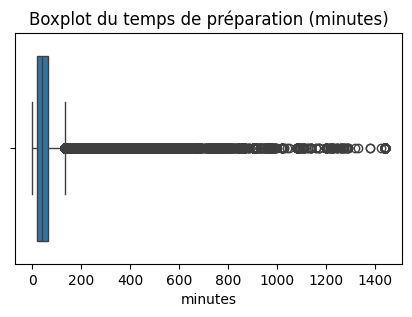

In [6]:
# Nouveau boxplot pour constater la distribution après le traitement
plt.figure(figsize=(5, 3))
sns.boxplot(x = 'minutes', data = recipe)
plt.title("Boxplot du temps de préparation (minutes)")
plt.xlabel("minutes")
plt.show()

Réfléchir a supprimer les recettes de plus de 6 heures.

Un effort culinaire selon le temps de préparation peut être grand à partir d'une recette qui prendrait plus de 30 minutes. 

In [7]:
# Supprimer les recette de plus de 6 heures
recipe = recipe[recipe['minutes'] <= 360]
recipe.reset_index(drop=True, inplace=True)
# Sauvegarder le dataset nettoyé
recipe.to_csv("recipe/3_recipe_cleaned_time_six.csv", index=False)
# Charger le nouveau dataset
recipe = pd.read_csv("recipe/3_recipe_cleaned_time_six.csv")
print(recipe.shape)

(221814, 6)


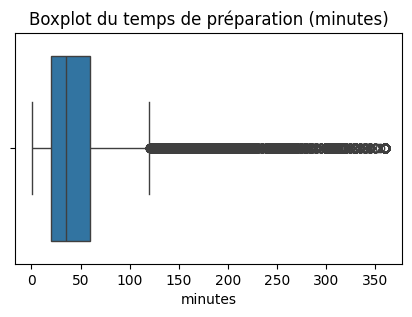

In [8]:
# Nouveau boxplot pour constater la distribution après le traitement
plt.figure(figsize=(5, 3))
sns.boxplot(x = 'minutes', data = recipe)
plt.title("Boxplot du temps de préparation (minutes)")
plt.xlabel("minutes")
plt.show()

In [9]:
# Calcul de statistiques descriptives de la colonne 'minutes'
print(recipe['minutes'].describe())

count    221814.000000
mean         50.953204
std          50.757913
min           1.000000
25%          20.000000
50%          35.000000
75%          60.000000
max         360.000000
Name: minutes, dtype: float64


Remarque : 
- Le temps de préparation médian est de 35 minutes, ce qui signifie que la moitié des recettes prennent moins de 35 minutes à préparer.
- Le temps de préparation moyen est de 60 minutes, ce qui indique que certaines recettes prennent beaucoup plus de temps à préparer, ce qui fait augmenter la moyenne.
- Le temps de préparation maximum est de 360 minutes (6 heures), ce qui est cohérent avec notre décision de filtrer les recettes pour ne garder que celles qui prennent 6 heures ou moins.

In [10]:
print("Skewness : ", recipe['minutes'].skew())
print("Kurtosis : ", recipe['minutes'].kurt())

Skewness :  2.6127547492737695
Kurtosis :  8.41639928058931


Remarque: 
- La skewness positive indique que la distribution est asymétrique avec une longue queue à droite, ce qui signifie qu'il y a un certain nombre de recettes qui prennent beaucoup plus de temps à préparer que la majorité.
- La kurtosis élevée (supérieure à 3) suggère que la distribution a des queues plus lourdes et un pic plus prononcé que la distribution normale, ce qui est cohérent avec la présence de quelques recettes très longues qui influencent la moyenne.

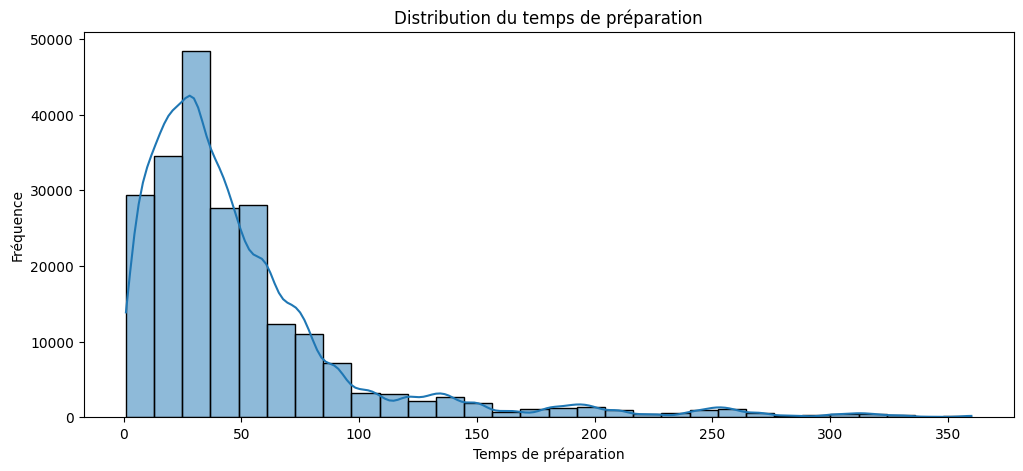

In [11]:
# représentation graphique
plt.figure(figsize=(12, 5))
sns.histplot(recipe['minutes'], bins=30, kde=True)
plt.title('Distribution du temps de préparation')
plt.xlabel('Temps de préparation')
plt.ylabel('Fréquence')
plt.show()

LOG des minutes

Passer à l'échelle logarithmique afin de réduire l'impact des valeurs extrêmes.

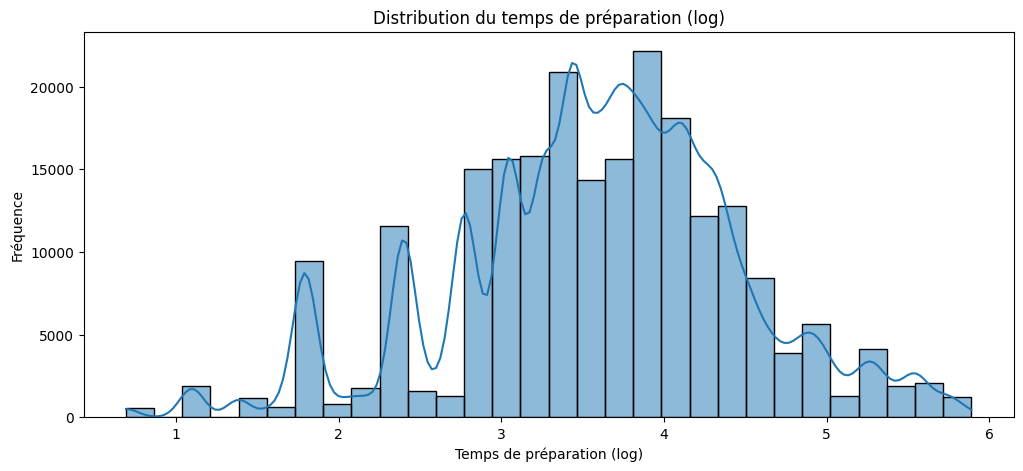

In [12]:
# Passer à l'échelle logarithmique pour mieux visualiser la distribution
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(recipe['minutes']), bins=30, kde=True)
plt.title('Distribution du temps de préparation (log)')
plt.xlabel('Temps de préparation (log)')
plt.ylabel('Fréquence')
plt.show()

In [13]:
# Création d'une variable recette rapide, moyenne, longue
def categorize_prep_time(minutes):
    if minutes < 30:
        return 'Rapide'
    elif 30 <= minutes <= 90:
        return 'Moyenne'
    else:
        return 'Longue'
# Ajout de la nouvelle variable au dataset
recipe['category_minutes'] = recipe['minutes'].apply(categorize_prep_time)

Les seuils ont été établi intuitivement. Voir code ci-dessous pour une répartition basée sur les données (percentiles). Discussion que l'on aura pour les variables steps et ingredient.

In [14]:
# Catégorisation basée sur les percentiles
def categorize_minutes_percentiles(recipe_data):
    q33 = recipe_data['minutes'].quantile(0.33)
    q67 = recipe_data['minutes'].quantile(0.67)
    
    def assign_category(minutes):
        if minutes < q33:
            return 'Rapide'
        elif q33 <= minutes < q67:
            return 'Moyenne'
        else:
            return 'Longue'
    
    recipe_data['category_minutes_balanced'] = recipe_data['minutes'].apply(assign_category)
    
    print(f"   • Rapide: < {q33:.0f} minutes")
    print(f"   • Moyenne: {q33:.0f} - {q67:.0f} minutes") 
    print(f"   • Longue: > {q67:.0f} minutes")
    
    return recipe_data

Sauvegarder le nouveau dataset avec la nouvelle variable : `category_minutes` :

In [15]:
# Sauvegarder le nouveau dataset
#recipe = categorize_minutes_percentiles(recipe)
#recipe.to_csv("recipe/4_recipe_minutes_category.csv", index=False)